In [ ]:
#<start>only for colab users

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.8 MB/s eta 0:00:00


In [2]:
!mkdir images

In [3]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/khandevane.jpg -P images

--2023-05-24 18:43:32--  https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/khandevane.jpg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/khandevane.jpg [following]
--2023-05-24 18:43:33--  https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/khandevane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134153 (131K) [image/jpeg]
Saving to: ‘images/khandevane.jpg’

khandevane.jpg      100%[===================>] 131.01K  --.-KB/s    in 0.03s   

2023-05-24 18:43:33 (4.99 MB/s) - ‘image

In [ ]:
#<end>only for colab users

In [4]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [5]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load image from file
pixels = plt.imread('./images/khandevane.jpg')

In [8]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

3/3 [==============================] - 0s 36ms/step


In [16]:
print(results[0]['box'])
results

[12, 83, 43, 53]


[{'box': [12, 83, 43, 53],
  'confidence': 0.9999846816062927,
  'keypoints': {'left_eye': (25, 104),
   'right_eye': (44, 102),
   'nose': (37, 113),
   'mouth_left': (28, 124),
   'mouth_right': (46, 122)}},
 {'box': [348, 43, 33, 43],
  'confidence': 0.9999695420265198,
  'keypoints': {'left_eye': (357, 58),
   'right_eye': (373, 58),
   'nose': (366, 68),
   'mouth_left': (358, 76),
   'mouth_right': (372, 76)}},
 {'box': [506, 54, 41, 54],
  'confidence': 0.9999595284461975,
  'keypoints': {'left_eye': (517, 74),
   'right_eye': (536, 76),
   'nose': (524, 84),
   'mouth_left': (518, 94),
   'mouth_right': (534, 96)}},
 {'box': [635, 68, 46, 53],
  'confidence': 0.9999410510063171,
  'keypoints': {'left_eye': (644, 88),
   'right_eye': (662, 83),
   'nose': (654, 97),
   'mouth_left': (652, 109),
   'mouth_right': (667, 105)}},
 {'box': [368, 122, 61, 83],
  'confidence': 0.9999399781227112,
  'keypoints': {'left_eye': (396, 158),
   'right_eye': (421, 156),
   'nose': (413, 174),

In [17]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        # show the plot
    plt.show()

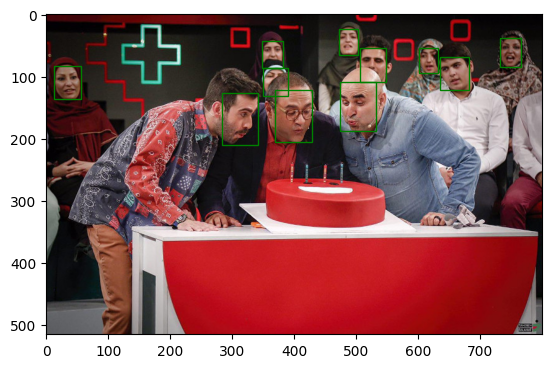

In [18]:
draw_facebox('./images/khandevane.jpg', results)

In [48]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=1, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

### تیکه کد تحلیلی خودم

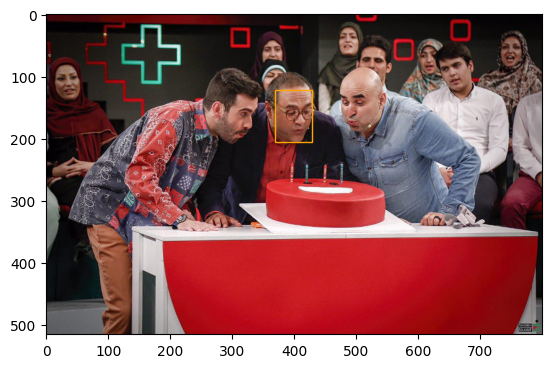

In [42]:
data = plt.imread('./images/khandevane.jpg')
plt.imshow(data)
ax = plt.gca()
x, y, width, height = results[4]['box']
rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
ax.add_patch(rect)
plt.show()

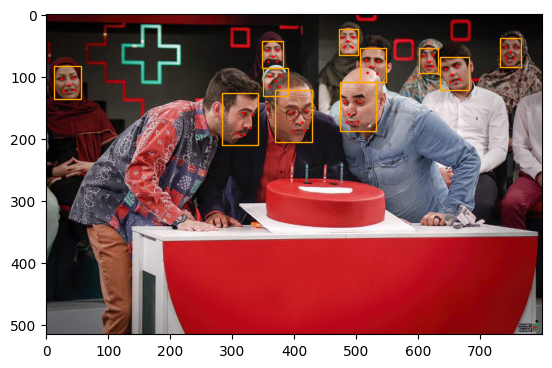

In [49]:
draw_facebox_and_keypoints('./images/khandevane.jpg', results)

source:

    https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49